# Ejercicio de autoexplicación

## Enunciado

La cercha presentada a continuación representa un puente que utiliza una cercha
tipo K. El puente tiene una longitud de 24 m y una altura de 6 m. La sección de
cada barra es de  $ A = 0.002 \text{ m}^2 $  y su módulo de Young es 
$ E = 200 \text{ GPa} $. El puente está sometido a una carga total equivalente
a 2000 kN, distribuida como se muestra en la figura: 

<div align="center">
    <img src="img/cercha_k.svg">
</div>

Se busca determinar si alguna de las barras del puente supera el esfuerzo de
fluencia a tracción de  $ 330 \text{ MPa} $.


Actualmente, el notebook no contiene celda de texto en donde se esté explicando
los procedimientos realizados o comentarios. Se solicita que se agreguen
explicanciones después de algunas de las celdas en donde se reflexione sobre
los procedimientos realizados en las celdas de código para resolver el problema
planteado anteriormente.

## Código

In [13]:
%matplotlib widget

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from plane_trusses import analysis

**1.** A continuación se presenta una celda de código. **Revise este código
y agregue una explicación en una celda posterior del notebook**.

In [15]:
nodes = np.array([
    [0,  0],
    [4,  0],
    [8,  0],
    [12, 0],
    [16, 0],
    [20, 0],
    [24, 0],
    [4,  6],
    [8,  6],
    [12, 6],
    [16, 6],
    [20, 6],
    [4,  3],
    [8,  3],
    [16, 3],
    [20, 3]])

cons = np.array([
    [-1, -1],
    [0, 0],
    [0, 0],
    [0, 0],
    [0, 0],
    [0, 0],
    [0, -1],
    [0, 0],
    [0, 0],
    [0, 0],
    [0, 0],
    [0, 0],
    [0, 0],
    [0, 0],
    [0, 0],
    [0, 0]], dtype=int)

loads = np.array([
    [0, 0],
    [0, -400e3],
    [0, -400e3],
    [0, -400e3],
    [0, -400e3],
    [0, -400e3],
    [0, 0],
    [0, 0],
    [0, 0],
    [0, 0],
    [0, 0],
    [0, 0],
    [0, 0],
    [0, 0],
    [0, 0],
    [0, 0]])

elements = np.array([
    [0, 0,  1],
    [0, 1,  2],
    [0, 2,  3],
    [0, 3,  4],
    [0, 4,  5],
    [0, 5,  6],
    [0, 7,  8],
    [0, 8,  9],
    [0, 9,  10],
    [0, 10, 11],
    [0, 0,  7],
    [0, 6,  11],
    [0, 1,  12],
    [0, 2,  13],
    [0, 4,  14],
    [0, 5,  15],
    [0, 12, 7],
    [0, 13, 8],
    [0, 14, 10],
    [0, 15, 11],
    [0, 2,  12],
    [0, 3,  13],
    [0, 3,  14],
    [0, 4,  15],
    [0, 12, 8],
    [0, 13, 9],
    [0, 9,  14],
    [0, 10, 15],
    [0, 3,  9]], dtype=int)

mats = np.array([[200e9, 0.002]])

data = {
  "nodes": nodes,
  "cons": cons,
  "elements": elements,
  "loads": loads,
  "mats": mats}

<div class="alert-info">

Agregue un párrafo explicando lo siguiente:

- ¿Cuál es el objetivo de la celda anterior?
    
- ¿Cuál es el significado de las variables
(`nodes`, `cons`, `loads`, `elements`, `mats`)?

<div/>

In [16]:
disp = analysis(data)

**2.** A continuación se presenta una celda de código. **Revise este código
y agregue una explicación en una celda posterior del notebook**.

In [17]:
def calc_esfuerzos_int(coords, eles, mats, desp):
    neles = eles.shape[0]
    esfuerzos = np.zeros((neles))
    for cont in range(neles):
        ini = eles[cont, 1]
        fin = eles[cont, 2]
        longitud = np.linalg.norm(coords[fin, :] - coords[ini, :])
        mat_id = eles[cont, 0]
        young, _ = mats[mat_id]
        long_nueva = np.linalg.norm(coords[fin, :] - coords[ini, :] +
                                    desp[fin, :] - desp[ini, :])
        elongacion = long_nueva - longitud
        esfuerzos[cont] = young * elongacion / longitud
    return esfuerzos

<div class="alert-info">

Agregue un párrafo explicando cómo la función `calc_esfuerzos_int`
calcula los esfuerzos internos en una cercha plana a partir
de las coordenadas de los nodos, la conectividad de los elementos, las
propiedades del material y los desplazamientos nodales.

<div/>

In [18]:
esfuerzos = calc_esfuerzos_int(nodes, elements, mats, disp)
esfuerzos / 330e6

array([ 1.08777438,  1.02022436,  1.61649835,  1.61649835,  1.02022436,
        1.08777438, -0.9922924 , -1.61582308, -1.61582308, -0.9922924 ,
       -1.79695401, -1.79695401,  0.61752076,  0.15619556,  0.15619556,
        0.61752076,  1.52397485,  0.45760858,  0.45760858,  1.52397485,
        0.76705744,  0.25278755,  0.25278755,  0.76705744, -0.75044702,
       -0.25251537, -0.25251537, -0.75044702,  0.3030303 ])

**3.** A continuación se presenta una celda de código. **Revise este código
y agregue una explicación en una celda posterior del notebook**.

In [19]:
def vis_esfuerzos(coords, eles, esfuerzos, desp=None):
    esfuerzo_max = max(-esfuerzos.min(), esfuerzos.max())
    esfuerzo_escalado = 0.5*(esfuerzos + esfuerzo_max)/esfuerzo_max
    x, y = coords.T
    if desp is None:
        desp = np.zeros_like(coords)
    for cont, barra in enumerate(eles[:, 1:]):
        color = plt.cm.seismic(esfuerzo_escalado[cont])
        plt.plot(x[barra] + desp[barra, 0], y[barra] + desp[barra, 1],
                color=color, lw=3)
        plt.plot(x + desp[:, 0], y + desp[:, 1], lw=0, marker="o",
             mec="#3c3c3c", mfc="#ffffff")
    plt.axis("image")

<div class="alert-info">

Agregue un párrafo explicando cómo la función `vis_esfuerzos`
representa los esfuerzos en la cercha mediante colores.

<div/>

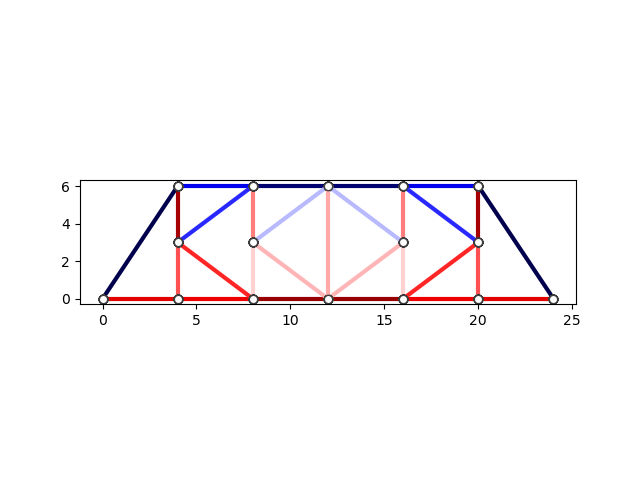

In [20]:
plt.figure()
vis_esfuerzos(nodes, elements, esfuerzos, desp=None)